# RNN
### 순환 신경망으로 불리며, 앞서 배운 신경망 모델과 다르게 은닉층 노드의 출력값을 출력층과 그 다음 시점의 은닉층 노드의 입력으로 전달해 순환하는 특성을 가지고 있다. 
### RNN에서 은닉층 노드는 이전 시점의 상탯값을 저장하는 메모리 역할을 수행하기 때문에 이것을 셀 또는 메모리 셀이라고 부른다. 은닉층의 메모리 셀의 출력 벡터는 출력층과 다음 시점의 메모리 세렝 전달되는데 이를 은닉 상태라고 한다.
### RNN에서 가장 중요한 점은 현재 시점의 메모리 셀이 이전 시점의 은닉 상태 값에 영향을 받으며 완전한 연결 계층 구조를 가지고 있다는 점이다.
### RNN의 모델 종류는 입력 개수와 출력 개수에 따라 구분한다.
#### many-to-one : 여러 개의 입력을 받아 하나의 출력을 내는 모델이다. 자연어 처리 분야에서는 메일 제목을 입력받아 메일이 스팸인지 아닌지 판단하는 모델로 사용가능하다.
#### one-to-many : 하나의 입력을 받아 여러 개의 출력을 내는 모델이다. 이것은 자연어 처리 분야에서는 잘 사용하지 않고, 주로 한 장의 이미지를 입력받아 이미지를 설명하는 텍스트를 출력하는 모델로 사용한다.
#### many-to-many : 여러 개의 입력을 받아 여러 개의 출력을 내는 모델이다. 이 모델은 앞으로 구현할 개체명 인식기에 주로 사용하는 모델이다. 단어 시퀀스를 입력으로 받아 각 시퀀스가 의미하는 개체명을 출력하는 구조이다. 또한 한국어를 입력받아 영어로 출력하는 번역기 모델로도 사용가능하다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

In [2]:
# n_timestep만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)

    return np.array(x), np.array(y)

In [3]:
# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, # 시작 범위는 -10
                          stop=10,    # 끝은 +10 까지
                          step=0.1)]  # 위와같은 x축 범위를 가지는 sin함수의 값을 0.1씩 증가
train_y = [np.sin(i) for i in x] # 0.1씩 증가시킨 sin함수 값을 저장

In [4]:
# 하이퍼파라미터
n_timesteps = 15 # 입력 시퀀스 길이를 15로 함. 이때, 15개의 메모리 셀이 생성됨
n_features = 1 # 입력 벡터의 차원은 1로 정의

In [5]:
# 시퀀스 나누기
# 파라미터 값 형태는 아래와 같다.
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps) # sin파형의 데이터가 들어있는 trian_y에서 입력 시퀀스 길이(15)만큼
                                                             # 나눠서 입력 시퀀스를 생성한다.
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


##### 케라스에서 RNN 계층을 사용하려면 3차원이어야 하므로 현재 2차인 trian_x(samples, n_timestep)을 데이터 형상에 맞게 3차원(batch size, time step, input length) 형태로 변환해야한다.

In [6]:
# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
# batch size = samples
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [17]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units=10, # RNN 계층에 존재하는 전체 뉴런 수
                    return_sequences=False, # 은닉 상태 값 출력 여부 (True = 모든 과정 출력,  False = 마지막 시점 출력)
                    input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#### early stop : 오버피팅을 피하기 위해 loss값이 갑자기 증가되는 시점을 찾아 조기 종료 함.

In [8]:
# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto') # patience=5로 설정, 성능이 증가하지 않을 때 5번 더 학습
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.0604
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.8729
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.7179
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.5905
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.4857
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.4006
Epoch 7/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3325
Epoch 8/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2768
Epoch 9/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2324
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1954
Epoch 11/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1667
Epoch 12/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1418
Epoch 13/1000
6/6 [==============================

6/6 [==============================] - 0s 5ms/step - loss: 2.2247e-04
Epoch 102/1000
6/6 [==============================] - 0s 5ms/step - loss: 2.1440e-04
Epoch 103/1000
6/6 [==============================] - 0s 5ms/step - loss: 2.0797e-04
Epoch 104/1000
6/6 [==============================] - 0s 5ms/step - loss: 2.0271e-04
Epoch 105/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.9500e-04
Epoch 106/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.9069e-04
Epoch 107/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.8453e-04
Epoch 108/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.8068e-04
Epoch 109/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.7384e-04
Epoch 110/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.6894e-04
Epoch 111/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.6553e-04
Epoch 112/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.5973

6/6 [==============================] - 0s 5ms/step - loss: 3.3637e-05
Epoch 198/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.3347e-05
Epoch 199/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.3199e-05
Epoch 200/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.2707e-05
Epoch 201/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.2405e-05
Epoch 202/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.2341e-05
Epoch 203/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.1968e-05
Epoch 204/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.1643e-05
Epoch 205/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.1619e-05
Epoch 206/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.1038e-05
Epoch 207/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.0881e-05
Epoch 208/1000
6/6 [==============================] - 0s 5ms/step - loss: 3.0614

6/6 [==============================] - 0s 5ms/step - loss: 1.9316e-05
Epoch 294/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.9095e-05
Epoch 295/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.8446e-05
Epoch 296/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.8486e-05
Epoch 297/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.7974e-05
Epoch 298/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.8145e-05
Epoch 299/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.7959e-05
Epoch 300/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.8044e-05
Epoch 301/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.8562e-05
Epoch 302/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.7377e-05
Epoch 303/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.7828e-05
Epoch 304/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.7367

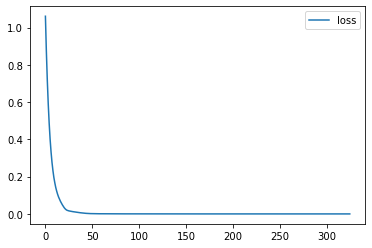

In [9]:
# loss 그래프 생성
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

#### 테스트셋으로 cos을 사용한 이유는 훈련셋이 sin이므로 테스트셋도 sin을 사용하면 동일한 데이터를 사용하여 동일한 결과를 출력하므로 의미가 없어진다. 따라서 파형과 주기가 차이나는 cos을 이용해 테스트셋을 생성하여 테스트를 할 것이다.

In [10]:
# 테스트 데이터셋 생성
test_x = np.arange(10, # 시작은 10
                   20, # 끝은 20까지
                   0.1) # 0.1씩 증가
calc_y = np.cos(test_x) # 테스트 정답 데이터

In [11]:
# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    train_y = model.predict(net_input, verbose=0)
    print(test_y.shape, train_y.shape, i, i + n_timesteps)
    test_y = np.append(test_y, train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

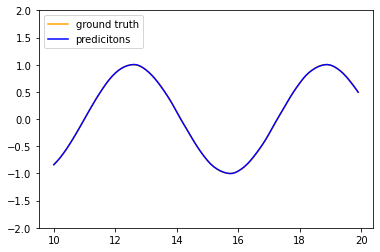

In [16]:
# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predicitons", color="blue")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()